# K-Means 色彩压缩

基于 sklearn 演示用 K-Means 进行色彩压缩。只是一个有趣的应用，用于了解 K-Means。

本实例参考自：   
Python Data Science Handbook：[In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)   
Scikit-learn examples: [Color Quantization using K-Means](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py)

## 加载图片

需要 PIL 库

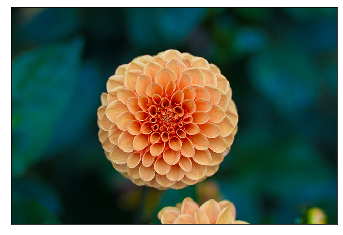

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import numpy as np

img = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [2]:
# (height, width, RGB)
img.shape

(427, 640, 3)

将图片转化为 [n_samples x n_features] 的形式，并映射到 0~1 上

In [3]:
data = img / 255.0 
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [4]:
# 绘制像素
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

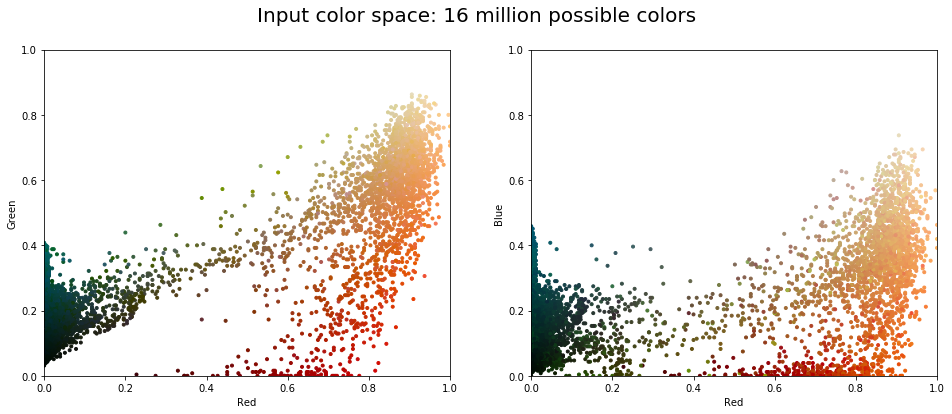

In [5]:
plot_pixels(data, title='Input color space: 16 million possible colors')

## K-Means

对原始像素进行重新着色，其中为每个像素分配了其最接近的聚类中心的颜色。

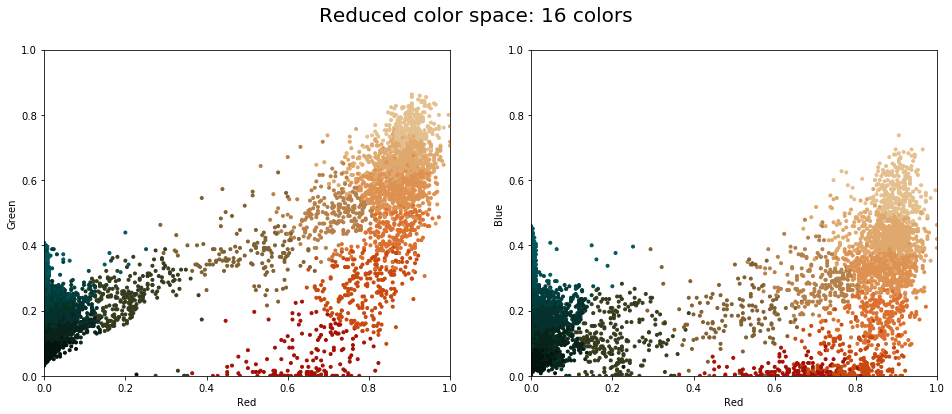

In [6]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

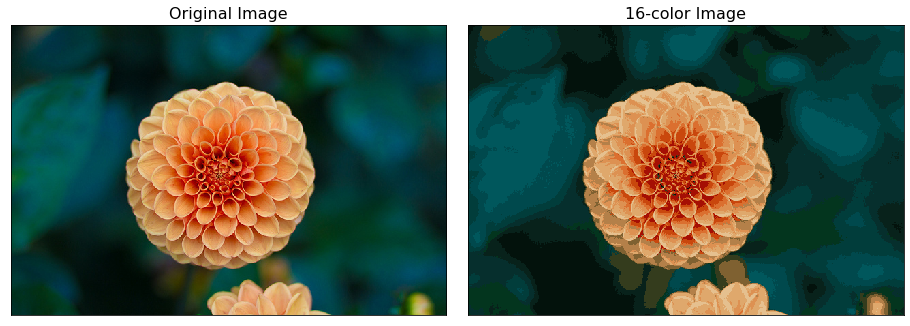

In [7]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('16-color Image', size=16);

在最右边的面板中肯定会丢失一些细节，但是整体图像仍然很容易辨认。